In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data=pd.get_dummies(data,drop_first=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
 4   Genre_Male              200 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 6.6 KB


In [9]:
data.drop('CustomerID',axis=1,inplace=True)

In [10]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [11]:
for i in range (len(data)):
    if data.loc[i,'Spending Score (1-100)']>100:
        print (i)

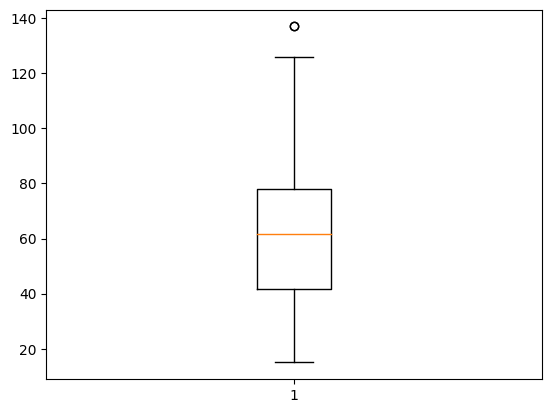

In [9]:
import matplotlib.pyplot as plt
plt.boxplot(data['Annual Income (k$)'])
plt.show()

In [13]:
data[data['Annual Income (k$)']==137].index

Int64Index([198, 199], dtype='int64')

In [14]:
for i in range (len(data)):
    if data.loc[i,'Annual Income (k$)']>data['Annual Income (k$)'].quantile(0.75):
        data.loc[i,'Annual Income (k$)']=data['Annual Income (k$)'].quantile(0.75)


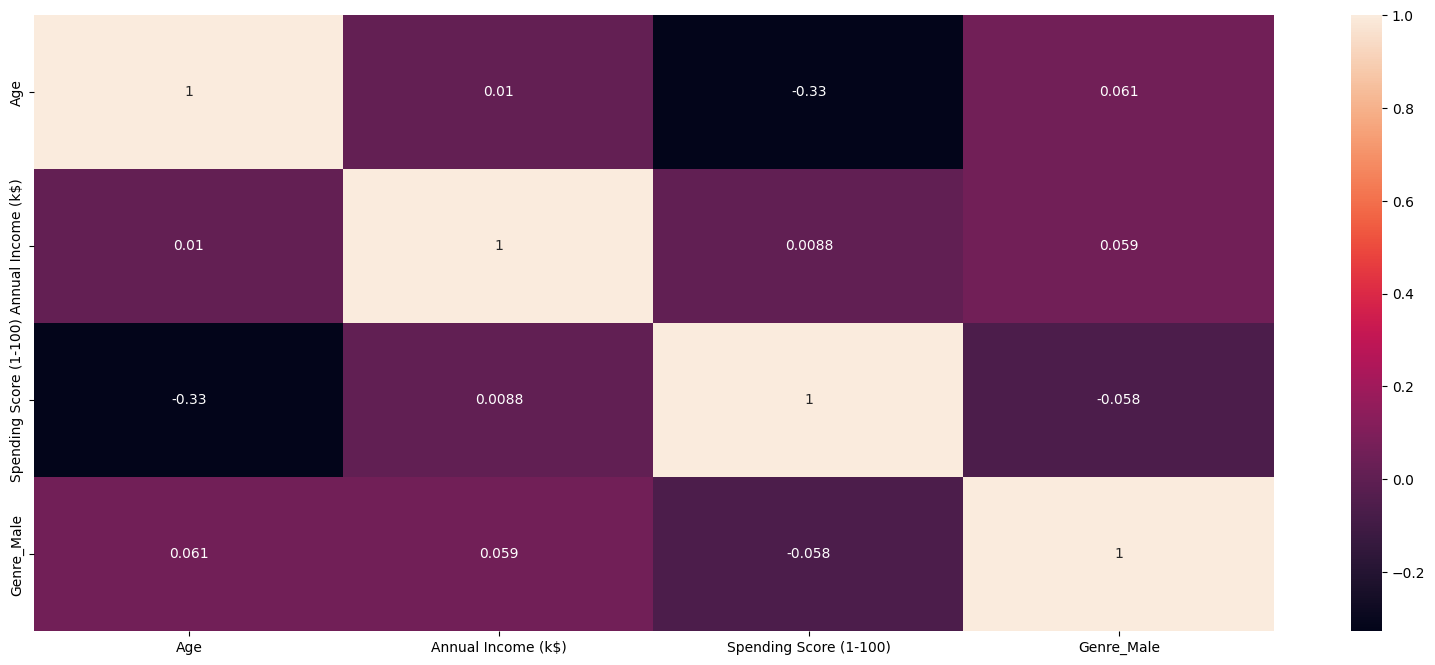

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [4]:
x=data.iloc[:,[2,3]].values
y=data['Spending Score (1-100)']

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)


In [5]:
from sklearn.cluster import KMeans

In [18]:
??KMeans

/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

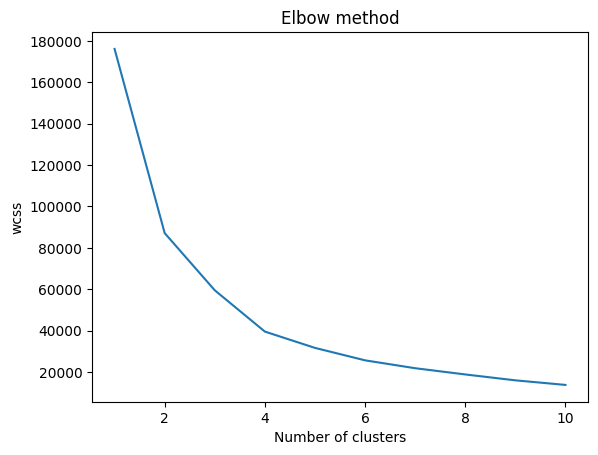

In [10]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4)
y_pred=kmeans.fit_predict(x)



/home/hagar/anaconda3/envs/myenvironment/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


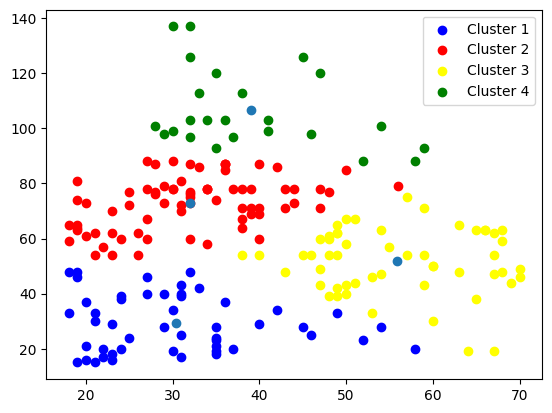

In [16]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'red', label = 'Cluster 2')
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], c = 'yellow', label = 'Cluster 3')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], c = 'green', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])   
plt.legend(labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [22]:
x.shape

(200, 2)

In [23]:
y_pred.shape

(200,)

In [29]:
kmeans.cluster_centers_

array([[37.19512195,  0.29268293],
       [82.35087719,  0.42105263],
       [53.31746032,  0.47619048],
       [11.84615385,  0.56410256]])

In [15]:
??legend()

Object `legend()` not found.
